<a href="https://colab.research.google.com/github/mdelhussieny/public/blob/main/Rafe_Zougari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project
---

## Exercise 1: Linear Regression
---
The aim of this exercise is to use Scikit-learn to implement Linear Regression examples. We will start with simple Linear Regression involving single variable and then we will move towards Linear Regression involving multiple variables.

The dataset used for this example is available and can be downloaded from this link: [riii/houseprices.csv at master · ywchiu/riii · GitHub](https://github.com/ywchiu/riii/blob/master/data/house-prices.csv)

This dataset includes a description of the houses prices according to many features (areas, bedrooms, bathrooms, etc).

1.   For the first part of this exercise, you consider only the feature area (i.e. SqFt).

        a) Plot the data points on 2-D graph to eyeball our dataset and see if we can manually findany relationship between the data.

        b) Train the Linear Regression model using this dataset (Single variable Linear Regression).

        c) Display the figure that illustrates the simple linear regression model. This Figure shows the plotted house-prices data, in which the x axis corresponds to area, and the y axis corresponds to price. Each point (x,y) denotes a training example.

2.   Train the Linear regression model using all the features (multivariate linear regression).

In [19]:
%matplotlib inline

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [52]:
path = 'house-prices.csv'

dataframe = pd.read_csv(path, index_col=False).set_index('Home')

In [53]:
dataframe.head(10)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
Home,,,,,,,
1,114300,1790,2,2,2,No,East
2,114200,2030,4,2,3,No,East
3,114800,1740,3,2,1,No,East
4,94700,1980,3,2,3,No,East
5,119800,2130,3,3,3,No,East
6,114600,1780,3,2,2,No,North
7,151600,1830,3,3,3,Yes,West
8,150700,2160,4,2,2,No,West
9,119200,2110,4,2,3,No,East


### Using only '**SqFt**' as Feature 
---



In [45]:
dataframe['SqFt']

Home
1      1790
2      2030
3      1740
4      1980
5      2130
       ... 
124    1900
125    2160
126    2070
127    2020
128    2250
Name: SqFt, Length: 128, dtype: int64

In [23]:
dataframe['Price']

0      114300
1      114200
2      114800
3       94700
4      119800
        ...  
123    119700
124    147900
125    113500
126    149900
127    124600
Name: Price, Length: 128, dtype: int64

#### Data ploting




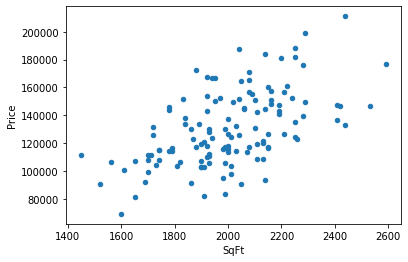

In [39]:
dataframe.plot(x='SqFt', y='Price', kind='scatter')
plt.show()

#### Single variable linear regression

In [46]:
x = np.array(dataframe['SqFt']).reshape(-1, 1)
y = np.array(dataframe['Price']).reshape(-1, 1)
print(f'Data shape >> x: {x.shape}, y: {y.shape}')

Data shape >> x: (128, 1), y: (128, 1)


In [31]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [41]:
model.score(x, y)

0.3057893605816919

In [42]:
print(f'Regression Parameters >> Coff: {model.coef_}, intercept: {model.intercept_}')

Regression Parameters >> Coff: [[70.22631824]], intercept: [-10091.12990912]


In [32]:
y_pred = model.predict(x)

#### Linear regression plot

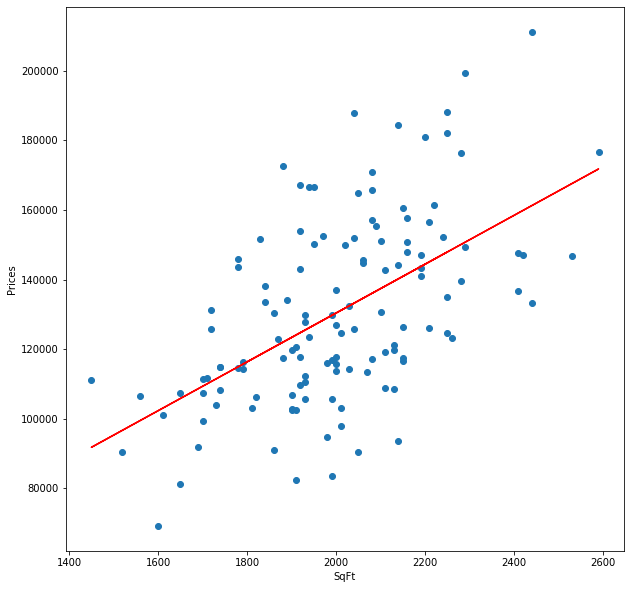

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('SqFt')
plt.ylabel('Prices')
plt.show()

### Uning all features
---

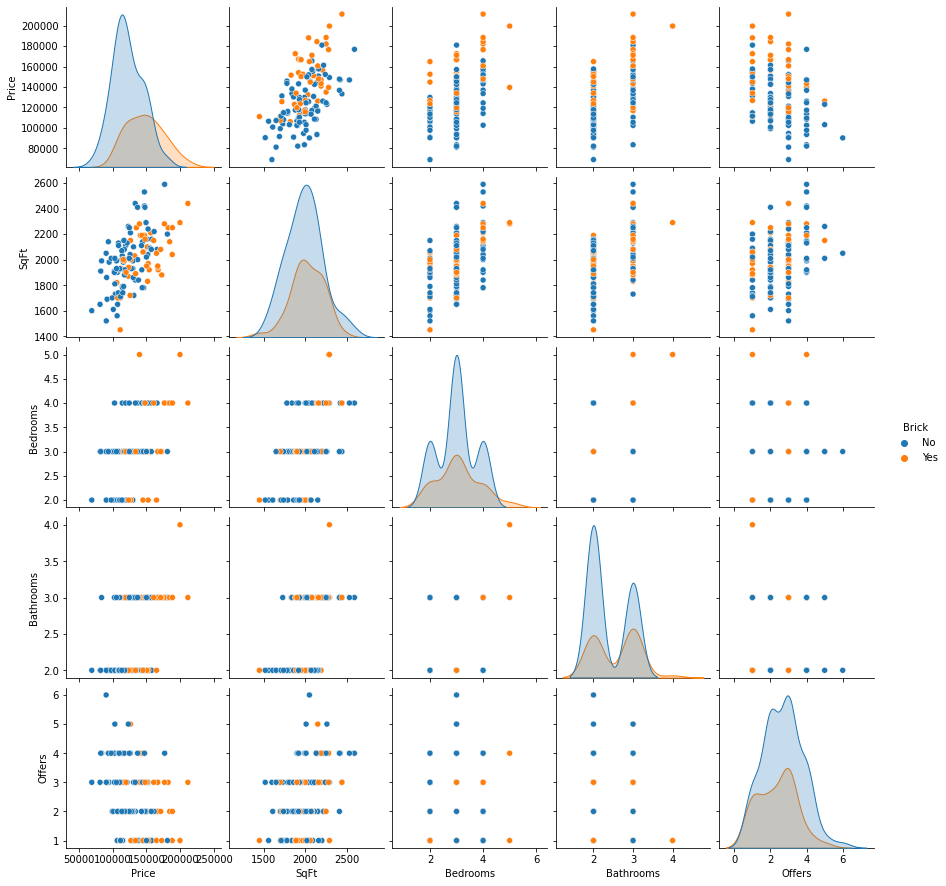

In [59]:
sns.pairplot(dataframe, hue='Brick', height=2.5)
plt.show()

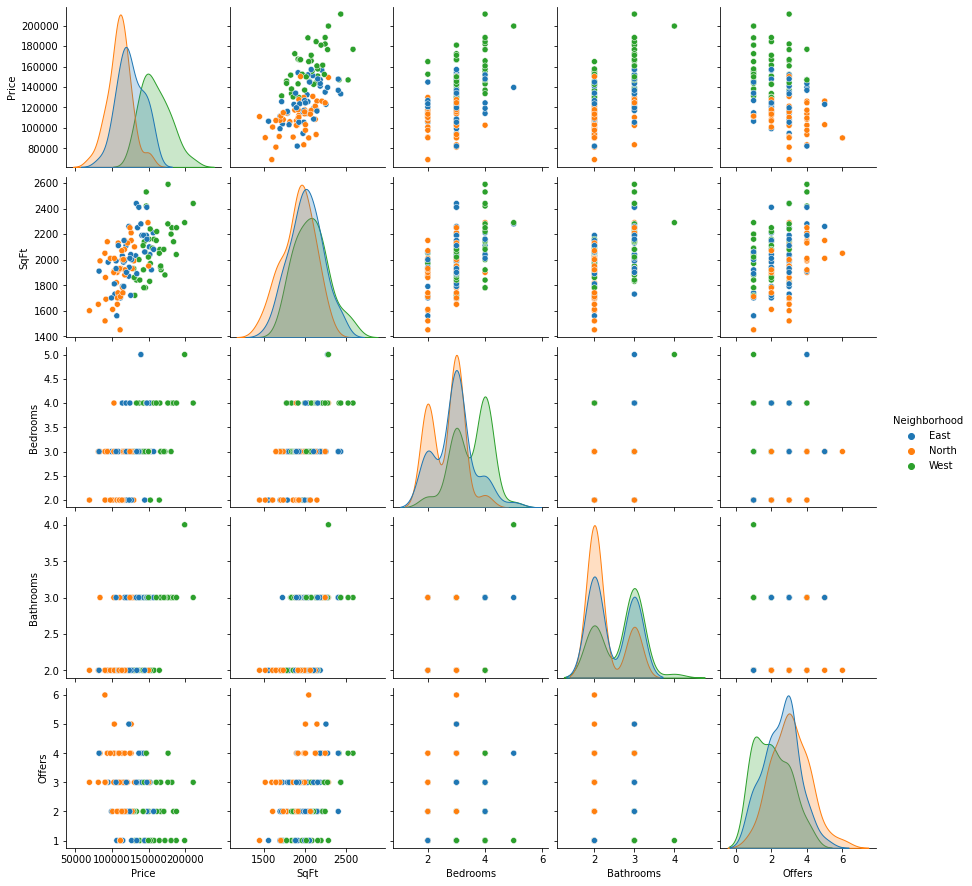

In [60]:
sns.pairplot(dataframe, hue='Neighborhood', height=2.5)
plt.show()

In [71]:
# conert Brick to numbers
dataframe['Brick'].replace(np.unique(dataframe['Brick'].values),
                        np.arange(len(np.unique(dataframe['Brick'].values))), inplace=True)
# conert Brick to numbers
dataframe['Neighborhood'].replace(np.unique(dataframe['Neighborhood'].values),
                        np.arange(len(np.unique(dataframe['Neighborhood'].values))), inplace=True)

In [72]:
dataframe.head(10)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
Home,,,,,,,
1,114300,1790,2,2,2,0,0
2,114200,2030,4,2,3,0,0
3,114800,1740,3,2,1,0,0
4,94700,1980,3,2,3,0,0
5,119800,2130,3,3,3,0,0
6,114600,1780,3,2,2,0,1
7,151600,1830,3,3,3,1,2
8,150700,2160,4,2,2,0,2
9,119200,2110,4,2,3,0,0


In [73]:
x = dataframe.values[:, 1:]
y = dataframe.values[:, 0:1]
print(f'Data shape >> x: {x.shape}, y: {y.shape}')

Data shape >> x: (128, 6), y: (128, 1)


In [75]:
model = LinearRegression(normalize=True)
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [76]:
model.score(x, y)

0.852553457907981

In [77]:
print(f'Regression Parameters >> Coff: {model.coef_}, intercept: {model.intercept_}')

Regression Parameters >> Coff: [[    58.82937112   6381.81093787   8689.53761145 -10433.7670786
   18533.25929911   9519.91702965]], intercept: [-16085.53334313]


In [78]:
y_pred = model.predict(x)

In [92]:
prices = {'Actual Price' :y[:,0],
          'Predicted Price': y_pred[:,0]}

In [93]:
prices = pd.DataFrame(prices)
prices.head(10)

,Actual Price,Predicted Price
0,114300,98494.203897
1,114200,114943.107762
2,114800,112368.313357
3,94700,105619.828268
4,119800,123133.771547
5,114600,113807.638153
6,151600,143058.053570
7,150700,152064.527145
8,119200,119649.457451
9,104000,99602.023100


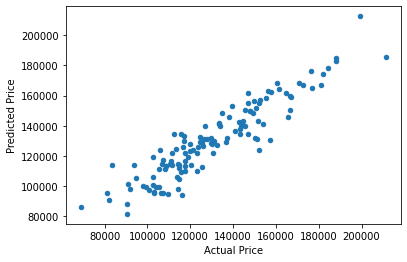

In [94]:
prices.plot(x='Actual Price', y='Predicted Price', kind='scatter')
plt.show()

## Exercise 2: Decision Tree and Naïve Bayes Classifiers
---
The aim of this exercise is to use Scikit-learn to Implement Decision Tree and Naïve Bayes Classifiers for classifying discrete categorical target variables (IRIS dataset).

IRIS dataset will be employed for building the Decision Tree classifier (scikit-learn library). This dataset includes three classes of iris plant, which are Iris Setosa, Iris Versicolour, Iris Virginica. Thus, our aim is to predict the class of the iris plant based on the attributes (sepal length, sepal width, petal length and petal width).

1. Import the IRIS dataset under Scikit-Learn.
2. How many examples are there for each class?
3. Split IRIS dataset into train and test sets.
4. Apply the DecisionTreeClassifier() algorithm to the IRIS dataset taking into account the algorithm parameters:
    *   entropy
    *   max_depth
    *   min_samples_split
5. Interpret the results according to accuracy and confusion_matrix.
6. Visualize the obtained decision tree.
7. Try different values for max-depth and min_samples_split. What do you notice?
8. Apply the Naive Bayes algorithm to the Iris dataset.
9. Interpret the results according to accuracy and confusion_matrix.
10. Compare the two classifiers in order to determine the most efficient one for the IRIS dataset.
11. Try to modify the size of the training dataset (respectively of the test dataset) in order to get the maximum accuracy for both classifiers.

### Import the IRIS dataset under Scikit-Learn.
---

In [95]:
from sklearn import datasets

In [96]:
iris = datasets.load_iris()

In [98]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### Number of examples are there for each class
---

In [108]:
iris['target'][iris['target'] == 0].shape[0]

50

### Split IRIS dataset into train and test sets

In [109]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.25, random_state=42)

In [145]:
X_train.shape

(112, 4)

### Apply the DecisionTreeClassifier() algorithm to the IRIS dataset
---

In [146]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

In [173]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2)
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [174]:
y_pred = classifier.predict(X_test)  

### Interpret the results according to accuracy and confusion_matrix
---

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [176]:
print(accuracy_score(y_test, y_pred))

0.9736842105263158


In [177]:
confmat = confusion_matrix(y_test, y_pred)

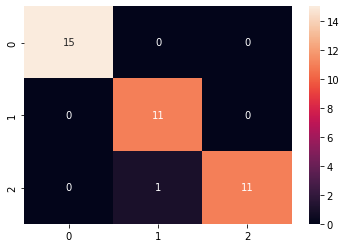

In [178]:
sns.heatmap(confmat, annot=True, fmt="d")
plt.show()

### Visualize the obtained decision tree
---

[Text(0.3333333333333333, 0.9375, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2222222222222222, 0.8125, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.4444444444444444, 0.8125, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.2222222222222222, 0.6875, 'X[3] <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3333333333333333, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6875, 'X[2] <= 5.15\nentropy = 0.527\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.5555555555555556, 0.5625, 'X[3] <= 1.75\nentropy = 0.896\nsamples = 16\nvalue = [0, 5, 11]'),
 Text(0.3333333333333333, 0.4375, 'X[1] <= 2.35\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.2222222222222222, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3125, 'X[2] <= 5.05\

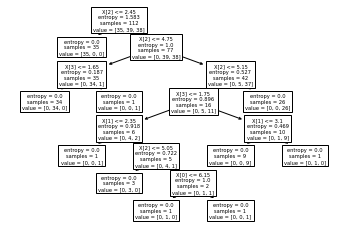

In [171]:
plot_tree(classifier)

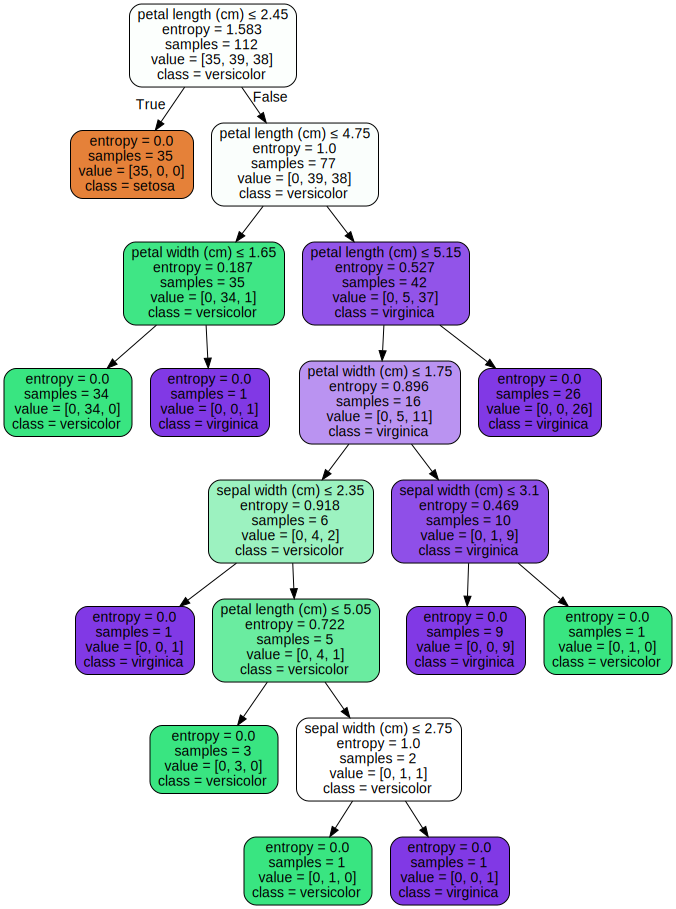

In [179]:
import graphviz 
#dot_data = export_graphviz(classifier, out_file=None) 
dot_data = export_graphviz(classifier, out_file=None, 
                           feature_names=iris.feature_names, 
                           class_names=iris.target_names, 
                           filled=True, rounded=True, 
                           special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph

#### Try different values for max-depth and min_samples_split
---

0.6842105263157895


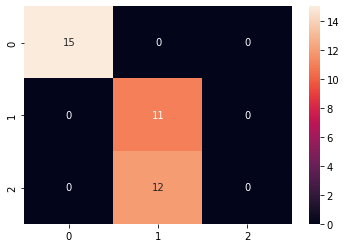

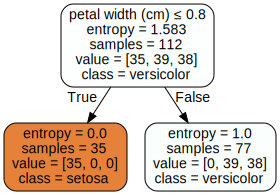

In [191]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
confmat = confusion_matrix(y_test, y_pred)
sns.heatmap(confmat, annot=True, fmt="d")
plt.show()
import graphviz 
#dot_data = export_graphviz(classifier, out_file=None) 
dot_data = export_graphviz(classifier, out_file=None, 
                           feature_names=iris.feature_names, 
                           class_names=iris.target_names, 
                           filled=True, rounded=True, 
                           special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph


### Apply the Naive Bayes algorithm to the Iris dataset
---

In [116]:
from sklearn.naive_bayes import GaussianNB  

In [155]:
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [156]:
y_pred = classifier.predict(X_test)  

#### Interpret the results according to accuracy and confusion_matrix
---

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [158]:
print(accuracy_score(y_test, y_pred))

1.0


In [161]:
confmat = confusion_matrix(y_test, y_pred)

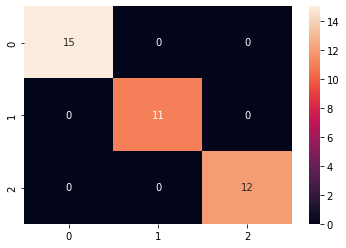

In [162]:
sns.heatmap(confmat, annot=True, fmt="d")
plt.show()

### Compare the two classifiers in order to determine the most efficient one for the IRIS dataset
---

#### Try to modify the size of the training dataset (respectively of the test dataset) in order to get the maximum accuracy for both classifiers
---

change the testsize ratio to find the effect
`X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=**0.25**, random_state=42)`